In [117]:
import cv2 # librería para digitalizar imagenes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd



# Importación Barra de color

In [118]:
# Cargar la imagen
img = cv2.imread('barraDeColor.jpg')




In [119]:
# Convertir la imagen de BGR (formato de OpenCV) a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

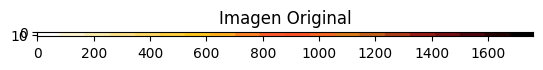

In [120]:
# Mostrar la imagen original para ver su formato
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.show()

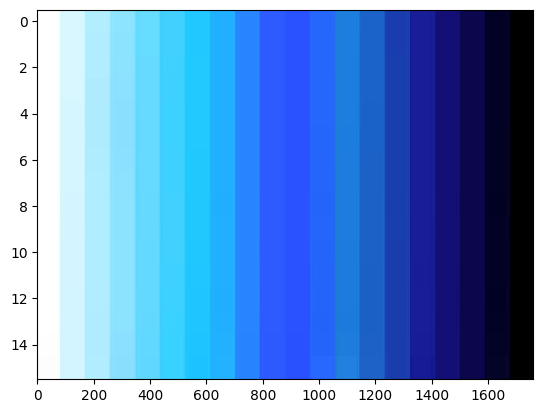

In [121]:
plt.imshow(img,aspect='auto',interpolation='nearest')

# Crear Modelo Prediicion vel color

In [122]:
# Normalizar los valores de la imagen entre 0 y 1
img_normalizada = img_rgb / 255.0  # La imagen se normaliza para estar en el rango [0, 1]

Normalización Barra

In [123]:
vel_min=5710*0.3048/1000 #vel Km/s
vel_min

1.7404080000000002

In [124]:
vel_max=16000*0.3048/1000 #vel Km/s
vel_max

4.8768

In [125]:
velocidad_matriz = vel_min + (img_normalizada * (vel_max - vel_min))

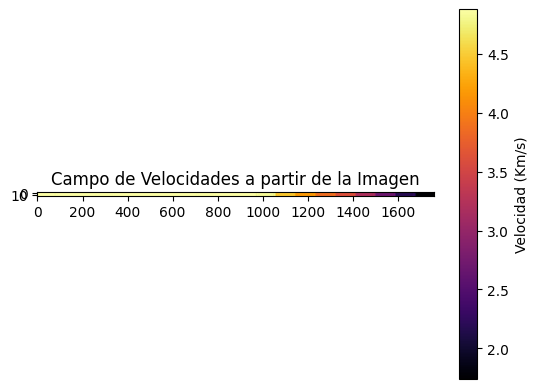

In [126]:
# Mostrar la matriz de velocidades (un solo canal, por ejemplo, el canal R de RGB)
plt.imshow(velocidad_matriz[:, :, 0], cmap='inferno')  # Usamos un canal para mostrar como escala
plt.colorbar(label='Velocidad (Km/s)')
plt.title('Campo de Velocidades a partir de la Imagen')
plt.show()

In [127]:
matriz_velocidad_final = velocidad_matriz[:, :, 0]  # Solo tomamos el canal R de RGB

In [128]:
matriz_velocidad_final.min()

1.7404080000000002

In [129]:

matriz_velocidad_final.max()
 

4.8768

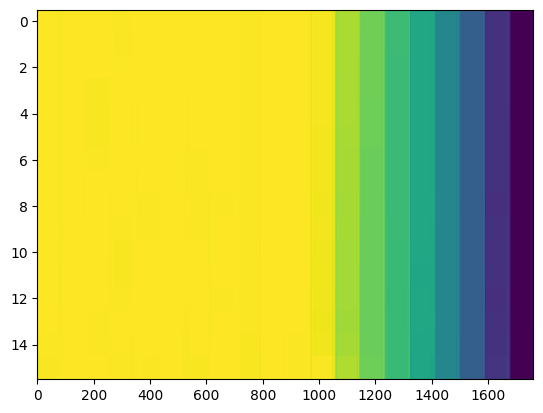

In [130]:
plt.imshow(matriz_velocidad_final,aspect='auto',interpolation='nearest')

# Importación campo de vel

In [131]:
CampoVel = cv2.imread('campo_vel.jpg')

In [132]:
CampoVel.shape

(695, 1109, 3)

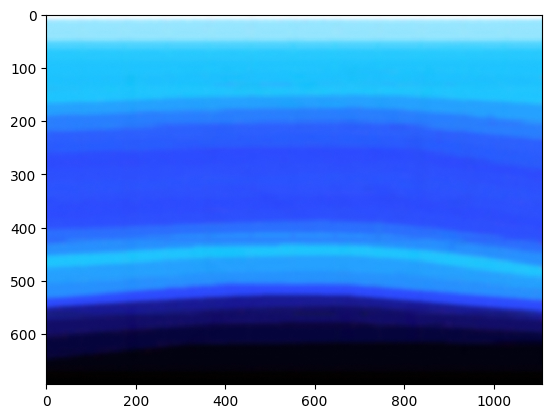

In [133]:
plt.imshow(CampoVel, aspect='auto', cmap='viridis', interpolation='nearest')

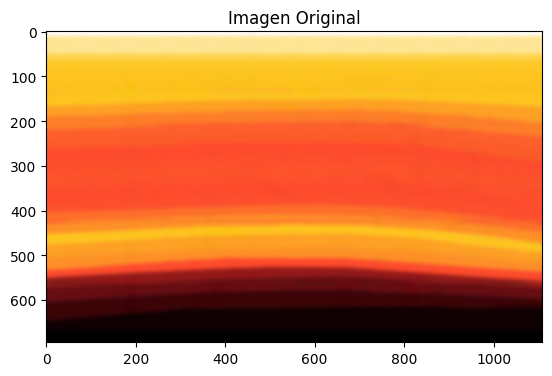

In [134]:

# Cargar la imagen


# Convertir la imagen de BGR (formato de OpenCV) a RGB
CampoVel_rgb = cv2.cvtColor(CampoVel, cv2.COLOR_BGR2RGB)
# Mostrar la imagen original para ver su formato
plt.imshow(CampoVel_rgb)
plt.title('Imagen Original')
plt.show()



In [135]:
# Normalizar los valores de la imagen entre 0 y 1
CampoVel_normalizada = CampoVel_rgb / 255.0  # La imagen se normaliza para estar en el rango [0, 1]

In [136]:
print(CampoVel_rgb.shape)
print(CampoVel.shape)

(695, 1109, 3)
(695, 1109, 3)


In [137]:
# Mapear los valores normalizados a la escala de velocidad
# Usamos una fórmula de escalado lineal
velocidad_matriz = vel_max + (vel_min-vel_max)*CampoVel_normalizada

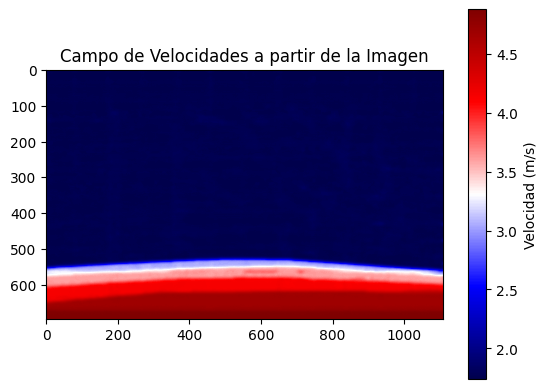

In [138]:







# Mostrar la matriz de velocidades (un solo canal, por ejemplo, el canal R de RGB)
plt.imshow(velocidad_matriz[:, :, 0], cmap='seismic')  # Usamos un canal para mostrar como escala
plt.colorbar(label='Velocidad (m/s)')
plt.title('Campo de Velocidades a partir de la Imagen')
plt.show()

# Ahora tienes la matriz de velocidad_matriz que contiene los valores de velocidad
# Puedes extraer un canal si solo necesitas uno, por ejemplo, el canal R:
matriz_velocidad_final = velocidad_matriz[:, :, 0]  # Solo tomamos el canal R de RGB

# Atar modelo de velocidad a barra de colores
Se pudo observar que la barra de colores está discreizada en 20 pedazos cada uno con un vector rgb [R,G,B]. Las normalizaciones anteriores asumian un gradiente lineal ente el color más claro con el más oscuro ente el rango de velocidades. Como vamos a ver esto no es cierto ya que el comportamiento de los valores RGB no es lineal. Para encontrar un mejor modelo vamos a hacer una regresión para poder encontrar un mejor modelo entre colores y velocidades

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

En este dataframe se muestran los valores RGB vs el valor correspondiente a cada velocidad

In [140]:
df=pd.read_csv('Barra_de_color.csv',sep=";")


# Supongamos que df es tu DataFrame y 'v' es la columna objetivo
df['vel'] = df['vel'].str.replace(',', '.', regex=False).astype(float)

df

,vel,R,G,B
0,1.740408,255,255,255
1,1.905481,246,246,218
2,2.070555,239,237,184
3,2.235628,233,227,156
4,2.400701,229,219,126
5,2.565774,224,211,103
6,2.730848,220,202,88
7,2.895921,213,183,80
8,3.060994,203,150,71
9,3.226067,197,121,64


In [141]:
X=df[['R','G','B']]
y=df['vel']

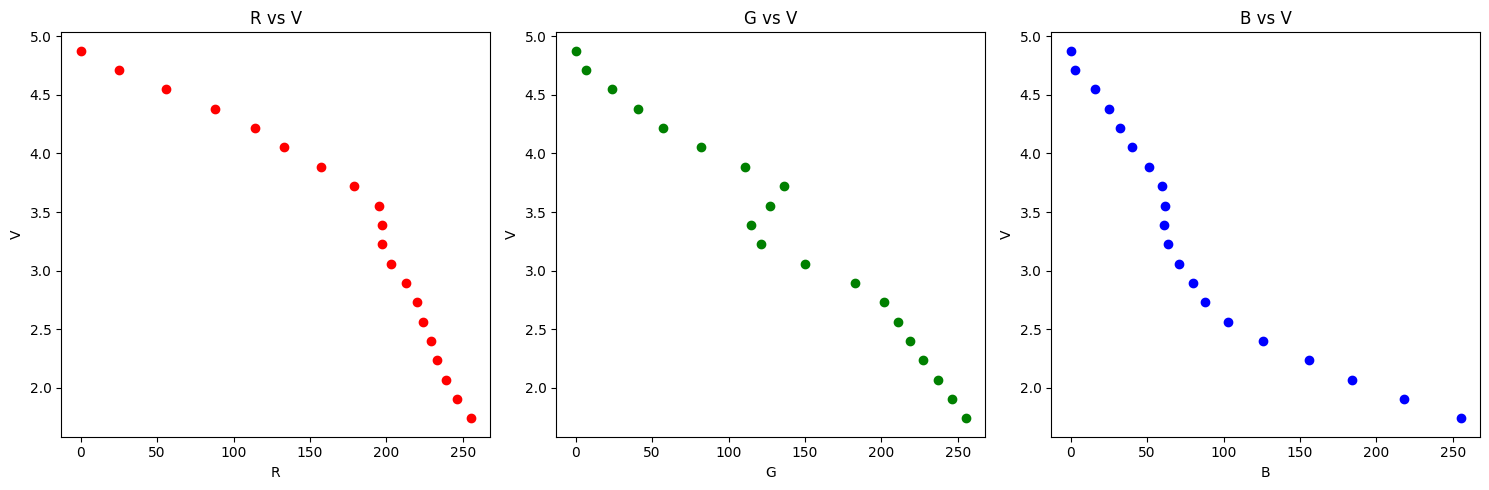

In [142]:
import matplotlib.pyplot as plt

# Crear figuras y ejes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico r vs y
axs[0].scatter(df['R'], y, color='red')
axs[0].set_xlabel('R')
axs[0].set_ylabel('V')
axs[0].set_title('R vs V')

# Gráfico g vs y
axs[1].scatter(df['G'], y, color='green')
axs[1].set_xlabel('G')
axs[1].set_ylabel('V')
axs[1].set_title('G vs V')

# Gráfico b vs y
axs[2].scatter(df['B'], y, color='blue')
axs[2].set_xlabel('B')
axs[2].set_ylabel('V')
axs[2].set_title('B vs V')

plt.tight_layout()
plt.show()



Claramente se puede observar que el comportamiento RGV con respecto a la velocidad no es lineal. Lo que ratifica que una interpolacion lineal de colores estaba equivocada

In [143]:
X=df[['R','G','B']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
# Modelo de Regresión Lineal
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R^2
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Métricas de rendimiento:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"R^2: {r2:.4f}")


Métricas de rendimiento:
Error Cuadrático Medio (MSE): 0.0271
Raíz del Error Cuadrático Medio (RMSE): 0.1646
Error Absoluto Medio (MAE): 0.1369
R^2: 0.9763


Interpretación de las Métricas
Error Cuadrático Medio (MSE):

Valor: 0.0271
Indica que, en promedio, el cuadrado de los errores de predicción es 0.0271. Un valor bajo sugiere que el modelo hace predicciones bastante cercanas a los valores reales.
Raíz del Error Cuadrático Medio (RMSE):

Valor: 0.1646
Este valor indica que la desviación estándar de los errores de predicción es aproximadamente 0.1646. Al estar en las mismas unidades que tu variable objetivo v, proporciona una forma intuitiva de entender el tamaño del error.
Error Absoluto Medio (MAE):

Valor: 0.1369
Este valor representa el error promedio en términos absolutos. Significa que, en promedio, tus predicciones se desvían de los valores reales en aproximadamente 0.1369.
R^2 (Coeficiente de Determinación):

Valor: 0.9763
Este valor indica que el 97.63% de la varianza en la variable v puede ser explicada por las variables independientes r, g, y b. Un R^2 cercano a 1 indica un modelo que se ajusta muy bien a los datos.

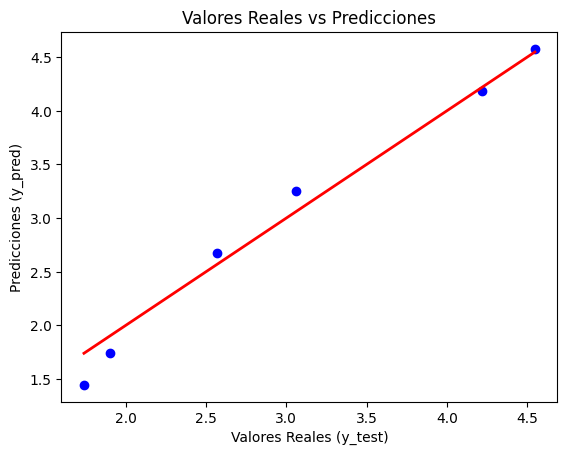

In [147]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs predicciones
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Valores Reales vs Predicciones')

plt.show()


En este grafico podemos ver que los valores predichos con respecto a los reales se acercan bastante

red nero

In [148]:
CampoVel_rgb[0][0]

array([243, 249, 247], dtype=uint8)

In [149]:
X.shape

(20, 3)

In [150]:
X.iloc[0].shape

(3,)

In [151]:
df_test=pd.DataFrame(X.iloc[0])
df_test.shape

(3, 1)

In [152]:
a=CampoVel_rgb[0][0].reshape((1, 3))
a.shape

(1, 3)

In [155]:

def vel_pred(matriz_rgb):
    # Convertir la matriz ixjx3 en un DataFrame de una sola vez
    matriz_reshaped = matriz_rgb.reshape(-1, 3)  # Convierte la matriz en 4x3 (sin bucles)
    # Suponiendo que b es la matriz de RGB y reg es el modelo de regresión lineal ya entrenado
    df_b = pd.DataFrame(matriz_reshaped, columns=['R', 'G', 'B'])
    # Realizar la predicción de todo el DataFrame en un solo paso
    predicciones = reg.predict(df_b)
    # Convertir las predicciones a una matriz 2x2
    c = predicciones.reshape(matriz_rgb.shape[0], matriz_rgb.shape[1])

    return c
    












In [156]:
v_final=vel_pred(CampoVel)

In [157]:
v_final.shape

(695, 1109)

In [158]:
v_final

array([[1.56901352, 1.55539341, 1.54125388, ..., 1.47414717, 1.47414717,
        1.47414717],
       [1.55487399, 1.54125388, 1.54125388, ..., 1.47821252, 1.47821252,
        1.47821252],
       [1.54683249, 1.53321238, 1.51959227, ..., 1.47821252, 1.49183263,
        1.47821252],
       ...,
       [4.92003521, 4.92003521, 4.92003521, ..., 4.92003521, 4.92003521,
        4.92003521],
       [4.92003521, 4.92003521, 4.92003521, ..., 4.92003521, 4.92003521,
        4.92003521],
       [4.92003521, 4.92003521, 4.92003521, ..., 4.92003521, 4.92003521,
        4.92003521]])

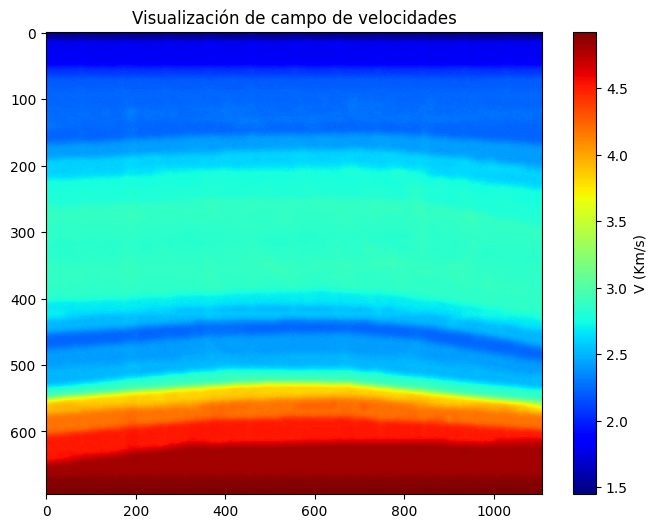

In [163]:


# Supongamos que 'v_final' es tu matriz que quieres mostrar
plt.figure(figsize=(8, 6))

# Crear la imagen con el mapa de color 'inferno'
plt.imshow(v_final, aspect='auto', cmap='jet', interpolation='nearest')

# Añadir una barra de color
cbar = plt.colorbar()
cbar.set_label('V (Km/s)')

# Añadir título
plt.title('Visualización de campo de velocidades')

# Mostrar el gráfico
plt.show()
